## Explore the Workers AI API using Python

[Workers AI](https://developers.cloudflare.com/workers-ai) allows you to run machine learning models, on the Cloudflare network, from your own code – whether that be from Workers, Pages, or anywhere via REST API.

This notebook will explore the Workers AI REST API using the [official Python SDK](https://github.com/cloudflare/cloudflare-python).

In [1]:
import sys
!{sys.executable} -m pip install python-dotenv requests
!{sys.executable} -m pip install cloudflare


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
from getpass import getpass

from cloudflare import Cloudflare
from IPython.display import display, Image, Markdown, Audio
import requests

In [3]:
%load_ext dotenv
%dotenv

### Configuring your environment

To use the API you'll need your [Cloudflare Account ID](https://dash.cloudflare.com). Head to AI > Workers AI page and press the "Use REST API". This page will let you create a new API Token and copy your Account ID.

If you want to add these values to your environment variables, you can **create a new file** named `.env` and this notebook will read those values.

```bash
CLOUDFLARE_API_TOKEN="YOUR-TOKEN"
CLOUDFLARE_ACCOUNT_ID="YOUR-ACCOUNT-ID"
```

Otherwise you can just enter the values securely when prompted below.

In [4]:
if "CLOUDFLARE_API_TOKEN" in os.environ:
    api_token = os.environ["CLOUDFLARE_API_TOKEN"]
else:
    api_token = getpass("Enter you Cloudflare API Token")

In [5]:
if "CLOUDFLARE_ACCOUNT_ID" in os.environ:
    account_id = os.environ["CLOUDFLARE_ACCOUNT_ID"]
else:
    account_id = getpass("Enter your account id")

In [6]:
# Initialize client
client = Cloudflare(api_token=api_token)

## Explore tasks available on the Workers AI Platform

### Text Generation

Explore all [Text Generation Models](https://developers.cloudflare.com/workers-ai/models#text-generation)

In [7]:
result = client.workers.ai.run(
    "@cf/meta/llama-3-8b-instruct" ,
    account_id=account_id,
    messages=[
        {"role": "system", "content": """
            You are a productivity assistant for users of Jupyter notebooks for both Mac and Windows users.
            
            Respond in Markdown."""
        },
        {"role": "user", "content": "How do I use keyboard shortcuts to execute cells?"}
    ]
)

display(Markdown(result["response"]))

**Using Keyboard Shortcuts to Execute Cells in Jupyter Notebooks**
===============================================================

Executing cells in Jupyter Notebooks can be done quickly and efficiently using various keyboard shortcuts, saving you time and effort. Here are the shortcuts you can use:

**Mac**

* **Shift + Enter**: Execute the current cell and insert a new cell below.
* **Ctrl + Enter**: Execute the current cell and insert a new cell below, without creating a new output display.

**Windows/Linux**

* **Shift + Enter**: Execute the current cell and insert a new cell below.
* **Ctrl + Enter**: Execute the current cell and move to the next cell.

**Additional Shortcuts**

* **Alt + Enter**: Execute the current cell and create a new output display below (Mac), or move to the next cell (Windows/Linux).
* **Ctrl + Shift + Enter**: Execute the current cell and create a new output display below (Mac), or create a new cell below (Windows/Linux).

**Tips and Tricks**

* You can also use the **Run Cell** button in the Jupyter Notebook toolbar, or the **Run** menu option (macOS) or **Run -> Run Cell** (Windows/Linux).
* To execute a selection of cells, use **Shift + Alt + Enter** (Mac) or **Shift + Ctrl + Enter** (Windows/Linux).
* To execute a cell and move to the next cell, use **Ctrl + Shift + Enter** (all platforms).

By using these keyboard shortcuts, you'll be able to work more efficiently and quickly in your Jupyter Notebooks. Happy coding!

### Text to Image

Explore all [Text to Image models](https://developers.cloudflare.com/workers-ai/models#text-to-image)

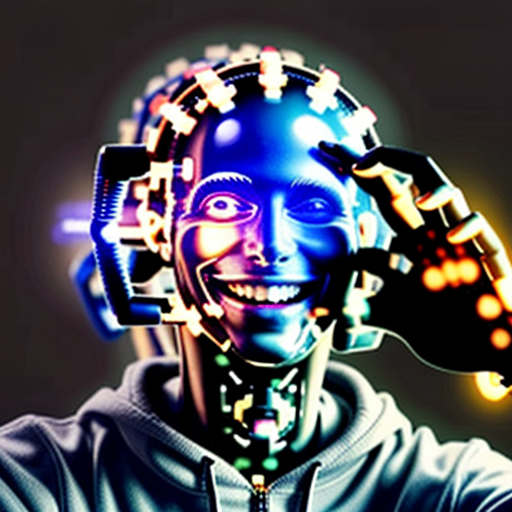

In [8]:
data = client.workers.ai.with_raw_response.run(
    "@cf/lykon/dreamshaper-8-lcm",
    account_id=account_id,
    prompt="A software developer incredibly excited about AI, huge smile",
)

display(Image(data.read()))

### Image to Text 

Explore all [Image to Text](https://developers.cloudflare.com/workers-ai/models/#image-to-text) models

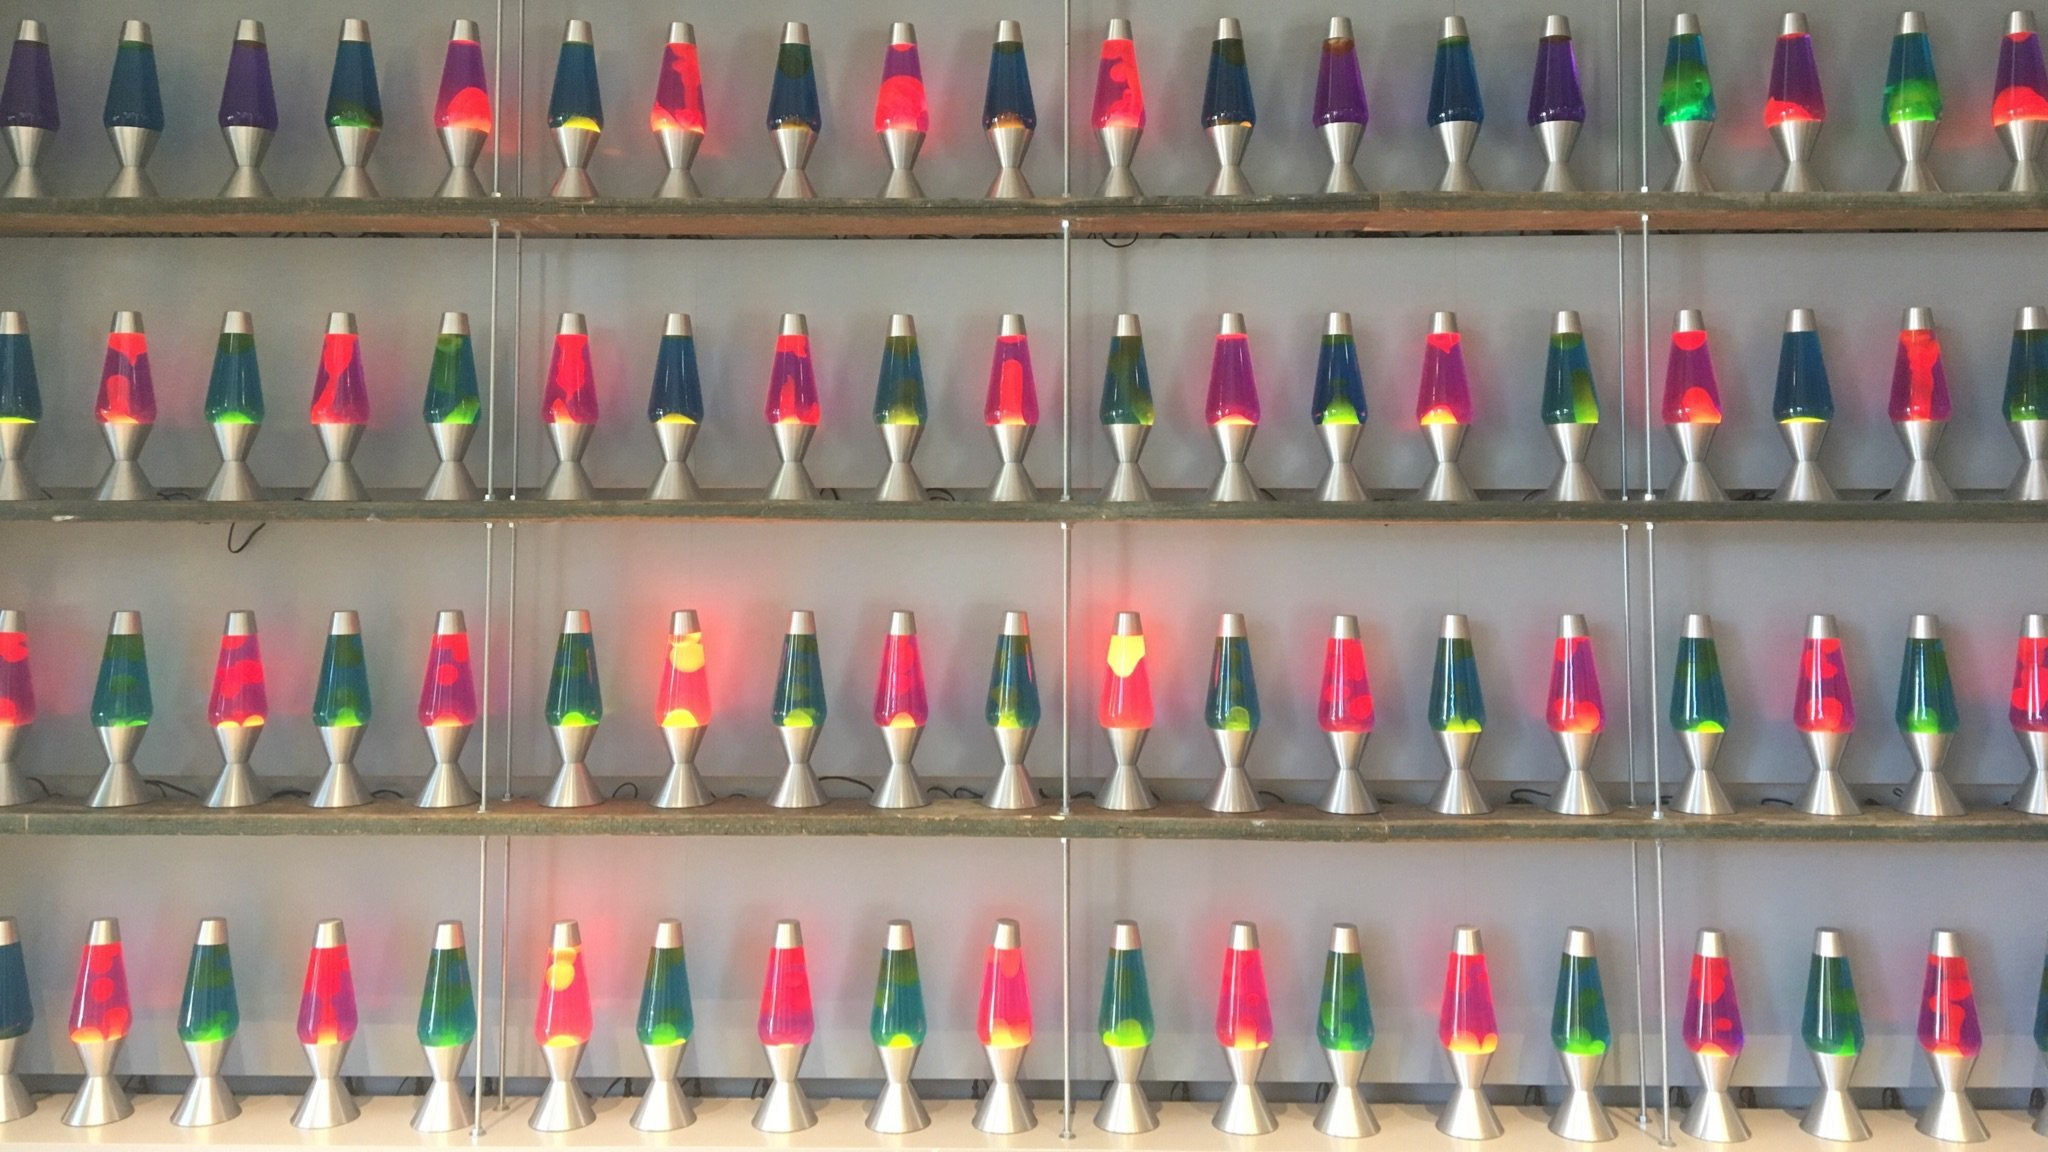

 The image features a display of various colored lava lamps. There are at least 14 lava lamps in the scene, each with a different color and design. The lamps are arranged in a visually appealing manner, with some placed closer to the foreground and others further back. The display creates an eye-catching and vibrant atmosphere, showcasing the diverse range of lava lamps available.


In [9]:
url = "https://blog.cloudflare.com/content/images/2017/11/lava-lamps.jpg"

image_request = requests.get(url, allow_redirects=True)

display(Image(image_request.content, format="jpg"))

data = client.workers.ai.run(
    "@cf/llava-hf/llava-1.5-7b-hf",
    account_id=account_id,
    image=image_request.content,
    prompt="Describe this photo",
    max_tokens=2048
)

print(data["description"])

### Automatic Speech Recognition

Explore all [Speech Recognition models](https://developers.cloudflare.com/workers-ai/models#speech-recognition)

In [10]:
url = "https://raw.githubusercontent.com/craigsdennis/notebooks-cloudflare-workers-ai/main/assets/craig-rambling.mp3"
display(Audio(url))
audio = requests.get(url)

response = client.workers.ai.run(
    "@cf/openai/whisper",
    account_id=account_id,
    audio=audio.content
)

response

{'text': "Hello there, I'm making a recording for a Jupiter notebook. That's a Python notebook, Jupiter, J-U-P-Y-T-E-R. Not to be confused with the planet. Anyways, let me hear, I'm gonna talk a little bit, I'm gonna make a little bit of noise, say some hard words, I'm gonna say Kubernetes, I'm not actually even talking about Kubernetes, I just wanna see if I can do Kubernetes. Anyway, this is a test of transcription and let's see how we're dead.",
 'word_count': 84,
 'vtt': "WEBVTT\n\n00.280 --> 01.840\nHello there, I'm making a\n\n01.840 --> 04.060\nrecording for a Jupiter notebook.\n\n04.060 --> 06.440\nThat's a Python notebook, Jupiter,\n\n06.440 --> 07.720\nJ -U -P -Y -T\n\n07.720 --> 09.420\n-E -R. Not to be\n\n09.420 --> 12.140\nconfused with the planet. Anyways,\n\n12.140 --> 12.940\nlet me hear, I'm gonna\n\n12.940 --> 13.660\ntalk a little bit, I'm\n\n13.660 --> 14.600\ngonna make a little bit\n\n14.600 --> 16.180\nof noise, say some hard\n\n16.180 --> 17.540\nwords, I'm gonn

### Translations

Explore all [Translation models](https://developers.cloudflare.com/workers-ai/models#translation)

In [11]:
result = client.workers.ai.run(
    "@cf/meta/m2m100-1.2b",
    account_id=account_id,
    text="Artificial intelligence is pretty impressive these days. It is a bonkers time to be a builder",
    source_lang="english",
    target_lang="spanish"
)


print(result["translated_text"])

La inteligencia artificial es bastante impresionante en estos días.Es un buen momento para ser un constructor


### Text Classification

Explore all [Text Classification models](https://developers.cloudflare.com/workers-ai/models#text-classification)

In [12]:
result = client.workers.ai.run(
    "@cf/huggingface/distilbert-sst-2-int8",
    account_id=account_id,
    text="This taco is delicious"
)

result

[TextClassification(label='NEGATIVE', score=0.00012679687642958015),
 TextClassification(label='POSITIVE', score=0.999873161315918)]

### Image Classification

Explore all [Image Classification models](https://developers.cloudflare.com/workers-ai/models#image-classification/)

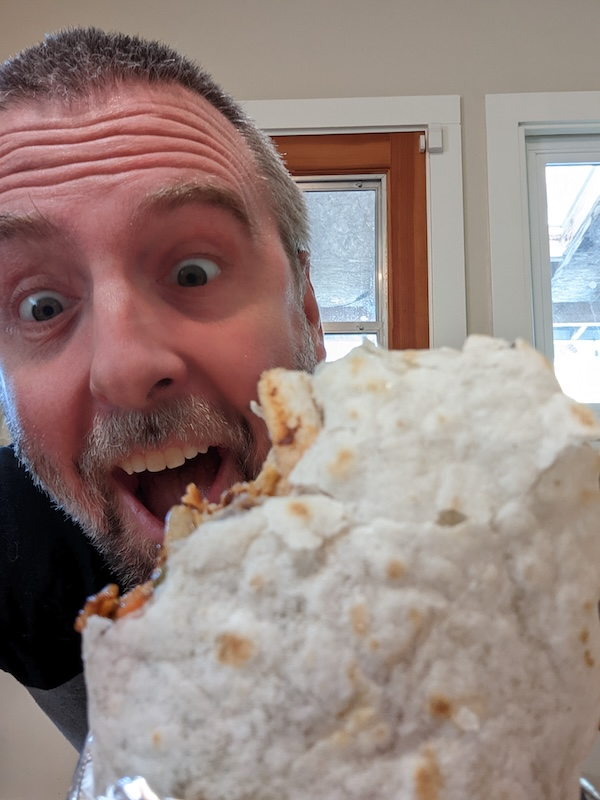

[TextClassification(label='BURRITO', score=0.9999679327011108),
 TextClassification(label='GUACAMOLE', score=8.516660273016896e-06),
 TextClassification(label='BAGEL', score=4.689153229264775e-06),
 TextClassification(label='SPATULA', score=4.075985089002643e-06),
 TextClassification(label='POTPIE', score=3.0849002996546915e-06)]

In [13]:
url = "https://raw.githubusercontent.com/craigsdennis/notebooks-cloudflare-workers-ai/main/assets/craig-and-a-burrito.jpg"
image_request = requests.get(url, allow_redirects=True)

display(Image(image_request.content, format="jpg"))
response = client.workers.ai.run(
    "@cf/microsoft/resnet-50",
    account_id=account_id,
    image=image_request.content
)
response

## Summarization

Explore all [Summarization](https://developers.cloudflare.com/workers-ai/models#summarization) based models

In [14]:
declaration_of_independence = """In Congress, July 4, 1776. The unanimous Declaration of the thirteen united States of America, When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature's God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. We hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness.--That to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed, --That whenever any Form of Government becomes destructive of these ends, it is the Right of the People to alter or to abolish it, and to institute new Government, laying its foundation on such principles and organizing its powers in such form, as to them shall seem most likely to effect their Safety and Happiness. Prudence, indeed, will dictate that Governments long established should not be changed for light and transient causes; and accordingly all experience hath shewn, that mankind are more disposed to suffer, while evils are sufferable, than to right themselves by abolishing the forms to which they are accustomed. But when a long train of abuses and usurpations, pursuing invariably the same Object evinces a design to reduce them under absolute Despotism, it is their right, it is their duty, to throw off such Government, and to provide new Guards for their future security.--Such has been the patient sufferance of these Colonies; and such is now the necessity which constrains them to alter their former Systems of Government. The history of the present King of Great Britain is a history of repeated injuries and usurpations, all having in direct object the establishment of an absolute Tyranny over these States. To prove this, let Facts be submitted to a candid world. He has refused his Assent to Laws, the most wholesome and necessary for the public good. He has forbidden his Governors to pass Laws of immediate and pressing importance, unless suspended in their operation till his Assent should be obtained; and when so suspended, he has utterly neglected to attend to them. He has refused to pass other Laws for the accommodation of large districts of people, unless those people would relinquish the right of Representation in the Legislature, a right inestimable to them and formidable to tyrants only. He has called together legislative bodies at places unusual, uncomfortable, and distant from the depository of their public Records, for the sole purpose of fatiguing them into compliance with his measures. He has dissolved Representative Houses repeatedly, for opposing with manly firmness his invasions on the rights of the people. He has refused for a long time, after such dissolutions, to cause others to be elected; whereby the Legislative powers, incapable of Annihilation, have returned to the People at large for their exercise; the State remaining in the mean time exposed to all the dangers of invasion from without, and convulsions within. He has endeavoured to prevent the population of these States; for that purpose obstructing the Laws for Naturalization of Foreigners; refusing to pass others to encourage their migrations hither, and raising the conditions of new Appropriations of Lands. He has obstructed the Administration of Justice, by refusing his Assent to Laws for establishing Judiciary powers. He has made Judges dependent on his Will alone, for the tenure of their offices, and the amount and payment of their salaries. He has erected a multitude of New Offices, and sent hither swarms of Officers to harrass our people, and eat out their substance. He has kept among us, in times of peace, Standing Armies without the Consent of our legislatures. He has affected to render the Military independent of and superior to the Civil power. He has combined with others to subject us to a jurisdiction foreign to our constitution, and unacknowledged by our laws; giving his Assent to their Acts of pretended Legislation: For Quartering large bodies of armed troops among us: For protecting them, by a mock Trial, from punishment for any Murders which they should commit on the Inhabitants of these States: For cutting off our Trade with all parts of the world: For imposing Taxes on us without our Consent: For depriving us in many cases, of the benefits of Trial by Jury: For transporting us beyond Seas to be tried for pretended offences For abolishing the free System of English Laws in a neighbouring Province, establishing therein an Arbitrary government, and enlarging its Boundaries so as to render it at once an example and fit instrument for introducing the same absolute rule into these Colonies: For taking away our Charters, abolishing our most valuable Laws, and altering fundamentally the Forms of our Governments: For suspending our own Legislatures, and declaring themselves invested with power to legislate for us in all cases whatsoever. He has abdicated Government here, by declaring us out of his Protection and waging War against us. He has plundered our seas, ravaged our Coasts, burnt our towns, and destroyed the lives of our people. He is at this time transporting large Armies of foreign Mercenaries to compleat the works of death, desolation and tyranny, already begun with circumstances of Cruelty & perfidy scarcely paralleled in the most barbarous ages, and totally unworthy the Head of a civilized nation. He has constrained our fellow Citizens taken Captive on the high Seas to bear Arms against their Country, to become the executioners of their friends and Brethren, or to fall themselves by their Hands. He has excited domestic insurrections amongst us, and has endeavoured to bring on the inhabitants of our frontiers, the merciless Indian Savages, whose known rule of warfare, is an undistinguished destruction of all ages, sexes and conditions. In every stage of these Oppressions We have Petitioned for Redress in the most humble terms: Our repeated Petitions have been answered only by repeated injury. A Prince whose character is thus marked by every act which may define a Tyrant, is unfit to be the ruler of a free people. Nor have We been wanting in attentions to our Brittish brethren. We have warned them from time to time of attempts by their legislature to extend an unwarrantable jurisdiction over us. We have reminded them of the circumstances of our emigration and settlement here. We have appealed to their native justice and magnanimity, and we have conjured them by the ties of our common kindred to disavow these usurpations, which, would inevitably interrupt our connections and correspondence. They too have been deaf to the voice of justice and of consanguinity. We must, therefore, acquiesce in the necessity, which denounces our Separation, and hold them, as we hold the rest of mankind, Enemies in War, in Peace Friends. We, therefore, the Representatives of the united States of America, in General Congress, Assembled, appealing to the Supreme Judge of the world for the rectitude of our intentions, do, in the Name, and by Authority of the good People of these Colonies, solemnly publish and declare, That these United Colonies are, and of Right ought to be Free and Independent States; that they are Absolved from all Allegiance to the British Crown, and that all political connection between them and the State of Great Britain, is and ought to be totally dissolved; and that as Free and Independent States, they have full Power to levy War, conclude Peace, contract Alliances, establish Commerce, and to do all other Acts and Things which Independent States may of right do. And for the support of this Declaration, with a firm reliance on the protection of divine Providence, we mutually pledge to each other our Lives, our Fortunes and our sacred Honor."""
len(declaration_of_independence)

8116

In [15]:
response = client.workers.ai.run(
    "@cf/facebook/bart-large-cnn",
    account_id=account_id,
    input_text=declaration_of_independence
)

response["summary"]

'The Declaration of Independence was signed by the thirteen states on July 4, 1776. It was the first attempt at a U.S. Constitution. It declared the right of the people to change their Government.'